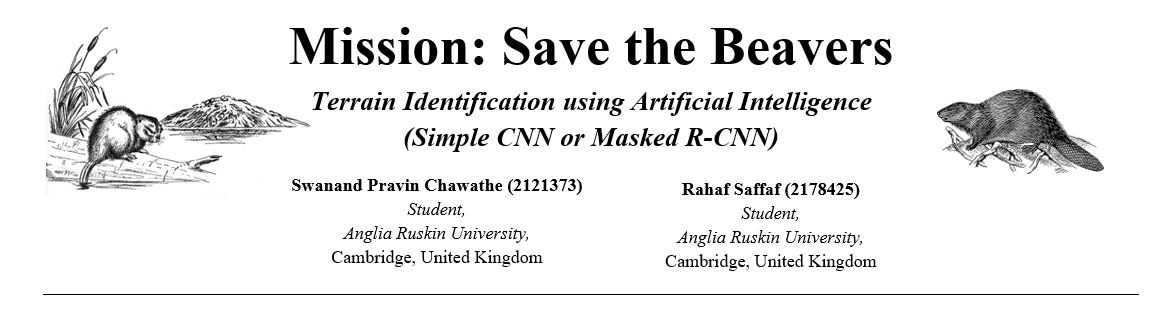

**EXPERIMENT II** 

(Mask RCNN - Part 2 Model Training)


*Note: This is a continuation to part 1 which takes care of data preparation

**Installing Packages**

In [1]:
!pip3 install -r requirements.txt

  Using cached tensorflow-2.2.0-cp37-cp37m-win_amd64.whl (459.2 MB)
  Using cached tensorboard-2.2.2-py3-none-any.whl (3.0 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorflow_estimator-2.2.0-py2.py3-none-any.whl (454 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Attempting uninstall: gast
    Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.0.0
    Uninstalling tensorflow-2.0.0:
      Successfully uninstalled tensorflow-2.0.0


In [ ]:
#!python3 setup.py install --user
!python3 setup.py install --user


In [2]:
!pip install protobuf==3.20.*--user

ERROR: Could not find a version that satisfies the requirement protobuf==3.20.*--user (from versions: 2.0.0b0, 2.0.3, 2.3.0, 2.4.1, 2.5.0, 2.6.0, 2.6.1, 3.0.0a2, 3.0.0a3, 3.0.0b1, 3.0.0b1.post1, 3.0.0b1.post2, 3.0.0b2, 3.0.0b2.post1, 3.0.0b2.post2, 3.0.0b3, 3.0.0b4, 3.0.0, 3.1.0, 3.1.0.post1, 3.2.0rc1, 3.2.0rc1.post1, 3.2.0rc2, 3.2.0, 3.3.0, 3.4.0, 3.5.0.post1, 3.5.1, 3.5.2, 3.5.2.post1, 3.6.0, 3.6.1, 3.7.0rc2, 3.7.0rc3, 3.7.0, 3.7.1, 3.8.0rc1, 3.8.0, 3.9.0rc1, 3.9.0, 3.9.1, 3.9.2, 3.10.0rc1, 3.10.0, 3.11.0rc1, 3.11.0rc2, 3.11.0, 3.11.1, 3.11.2, 3.11.3, 3.12.0rc1, 3.12.0rc2, 3.12.0, 3.12.1, 3.12.2, 3.12.4, 3.13.0rc3, 3.13.0, 3.14.0rc1, 3.14.0rc2, 3.14.0rc3, 3.14.0, 3.15.0rc1, 3.15.0rc2, 3.15.0, 3.15.1, 3.15.2, 3.15.3, 3.15.4, 3.15.5, 3.15.6, 3.15.7, 3.15.8, 3.16.0rc1, 3.16.0rc2, 3.16.0, 3.17.0rc1, 3.17.0rc2, 3.17.0, 3.17.1, 3.17.2, 3.17.3, 3.18.0rc1, 3.18.0rc2, 3.18.0, 3.18.1, 3.18.3, 3.19.0rc1, 3.19.0rc2, 3.19.0, 3.19.1, 3.19.2, 3.19.3, 3.19.4, 3.19.5, 3.19.6, 3.20.0rc1, 3.20.0rc2, 3.

**Installing Libraries**

In [3]:
#importing the libraries
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib as mpl
import skimage.io
from tqdm import tqdm

mpl.use('TkAgg')
import matplotlib.pyplot as plt

from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Using TensorFlow backend.


**Setting Folder Paths**

In [4]:
#initializing the paths of the images folders
ROOT_DIR = os.path.abspath("")
sys.path.append(ROOT_DIR)

MODEL_DIR = os.path.join(ROOT_DIR, "logs/")
print(MODEL_DIR)
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
IMAGES_PATH_TRAIN = 'data/resized_data/images/train/'
MASKS_PATH_TRAIN = 'data/resized_data/masks/train/'
IMAGES_PATH_VAL = 'data/resized_data/images/val/'
MASKS_PATH_VAL = 'data/resized_data/masks/val/'

C:\Users\rahaf\terrian\logs/


**Model Tuning**

We Ran this multiple times on 4 different models

MODEL 1
ResNet101 - lr=0.001

MODEL 2
ResNet101 - lr=0.0001

MODEL 3
ResNet50 - lr=0.001

MODEL 4
ResNet50 - lr=0.0001


In [16]:
#Setting the hyperparametrs of the model

class TerrainConfing(Config):
    NAME = 'terrain'

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES = 1 + 8

    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512

    STEPS_PER_EPOCH = 50 #236

    VALIDATION_STEPS = 36

    LEARNING_RATE = 0.001  # 0.0001

    BACKBONE = 'resnet101' #resnet50


config = TerrainConfing()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                21
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

**Setting Classes of the Model**

In [6]:
#Defining the class names for the classification task
class_names = ["BG",
               "water",
               "trees",
               "shrubs",
               "large_shrubs",
               "beaver_lodges",
               "beaver_dams",
               "vegetation",
               "mud"
               ]

**Defining Functions to Load images and masks**

In [17]:
#####
class TerrainDataset(utils.Dataset):
    def load_terrain(self, img_path, mask_path):
        image_files = os.listdir(img_path)
        mask_files = os.listdir(mask_path)

        index = 1
        for class_name in class_names:
            if class_name != 'BG':
                self.add_class("terrain", index, class_name)
                index += 1

        for file in tqdm(image_files, desc='Progress bar'):
            image_path = os.path.join(img_path, file)
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            masks = []
            for mask in mask_files:
                if mask.startswith(file.split('.')[0]):
                    masks.append(mask)

            polygons = []
            class_ids = []
            for mask in masks:
                path = os.path.join(mask_path, mask)
                m = cv2.imread(path, 0)
                m_class = mask.split('-')
                class_ids.append(class_names.index(m_class[1].split('.')[0]))
                polygons.append(m)

            self.add_image(
                'terrain',
                image_id=file,
                path=image_path,
                width=width,
                height=height,
                polygons=polygons,
                class_ids=class_ids
            )

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        mask = np.zeros([info['height'], info['width'], len(info['polygons'])], dtype=np.uint8)

        for i, p in enumerate(info['polygons']):
            mask[:, :, i] = p

        classIds = info['class_ids']
        classIds = np.array(classIds, dtype=np.uint32)

        return mask, classIds

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "terrain":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)

**Loading Data**

In [9]:
#Loading the training dataset
dataset_train = TerrainDataset()
dataset_train.load_terrain(IMAGES_PATH_TRAIN, MASKS_PATH_TRAIN)
dataset_train.prepare()

Progress bar: 100%|██████████| 7304/7304 [02:13<00:00, 54.78it/s]


In [10]:
#Loading the validation dataset
dataset_val = TerrainDataset()
dataset_val.load_terrain(IMAGES_PATH_VAL, MASKS_PATH_VAL)
dataset_val.prepare()

Progress bar: 100%|██████████| 1760/1760 [00:27<00:00, 63.55it/s]


**Initializing the model**

In [18]:
#initializing the model
model = modellib.MaskRCNN(mode='training', config=config, model_dir=MODEL_DIR)

In [19]:
###
init_with = 'coco'
#####
if init_with == 'imagenet':
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == 'coco':
    model.load_weights(COCO_MODEL_PATH, by_name=True, exclude=["mrcnn_class_logits",
                                                               "mrcnn_bbox_fc",
                                                               "mrcnn_bbox",
                                                               "mrcnn_mask"])
elif init_with == 'last':
    model.load_weights(model.find_last(), by_name=True)

**Model Training**

All 4 models ran on 360 epochs

In [ ]:
#Training the model
model.train(dataset_train, dataset_val,
            learning_rate=config.LEARNING_RATE,
            epochs=360 ,
            layers='all',
            )

In [ ]:
#Running a model inference to get the results
class InferenceConfig(TerrainConfing):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference",
                          config=inference_config,
                          model_dir=MODEL_DIR)

**Model h5 files of best epochs of the trained models**

MODEL 1
File: 11-04-2023_16-38-07_mask_rcnn_terrain_0037.h5


MODEL 2
File: 12-04-2023_11-30-30_mask_rcnn_terrain_0026.h5


MODEL 3
FIle: 12-04-2023_17-31-26_mask_rcnn_terrain_0029.h5


MODEL 4
File: 13-04-2023_11-27-13_mask_rcnn_terrain_0026.h5

In [ ]:
#using h5 file of the best epoch
model_path = "logs/12-04-2023_11-30-30_mask_rcnn_terrain_0026.h5"

In [ ]:
# Loading trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

In [ ]:
#Generating an image output
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config,
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id,
                            dataset_train.class_names, figsize=(8, 8))

**Sample Images generated by model 1 epoch 37**
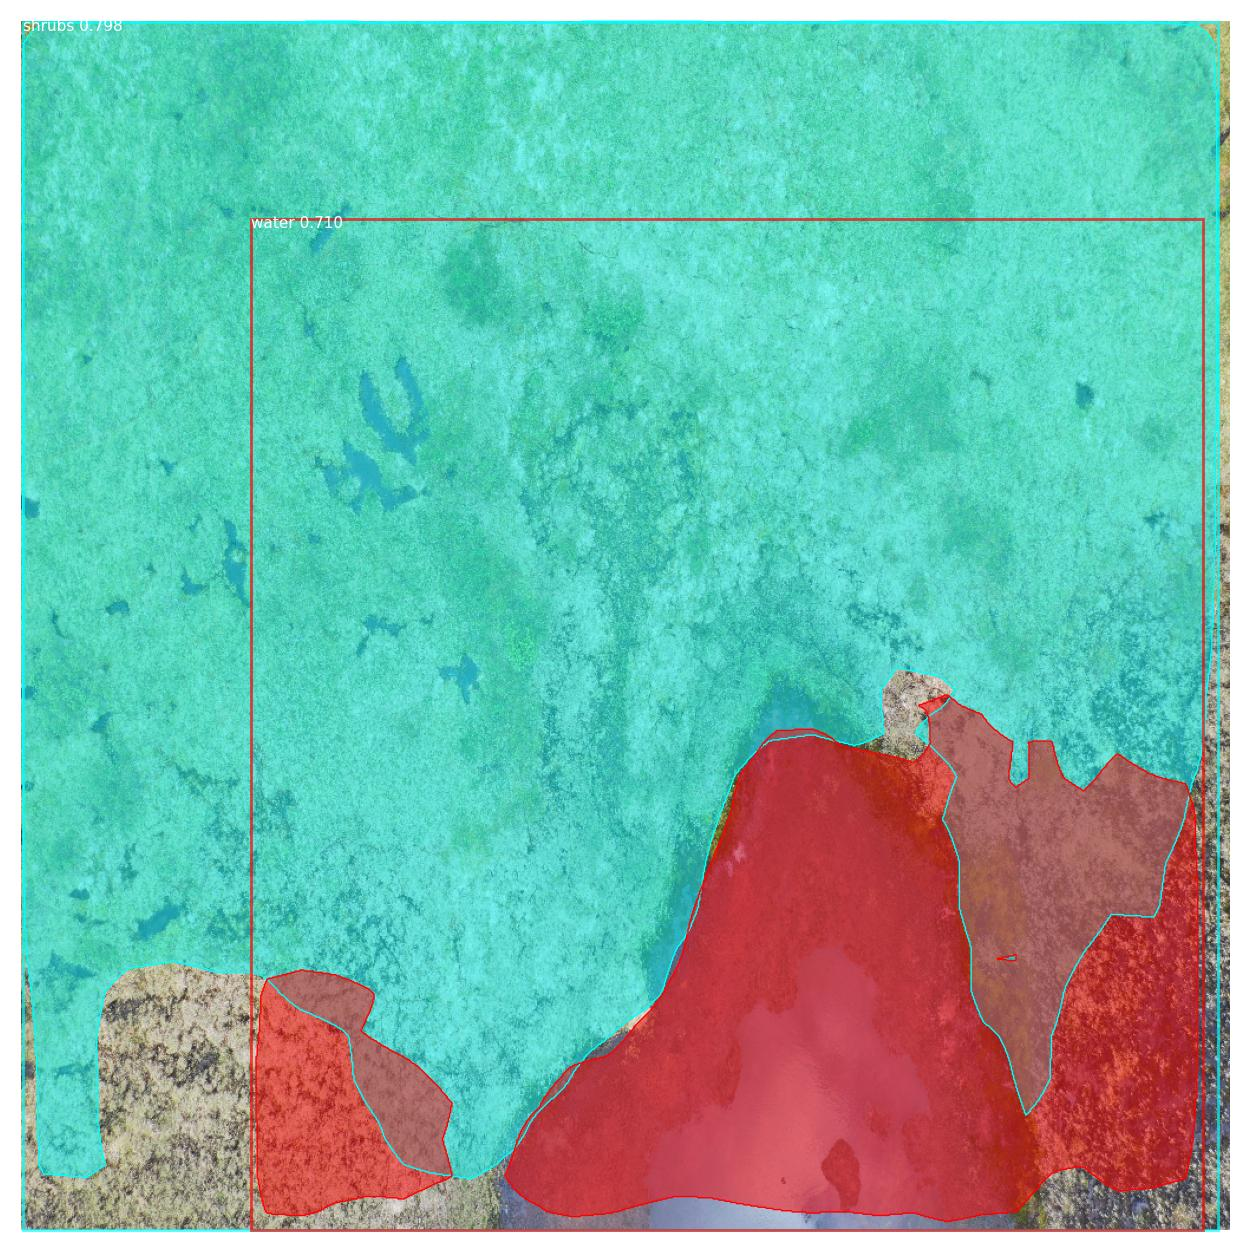


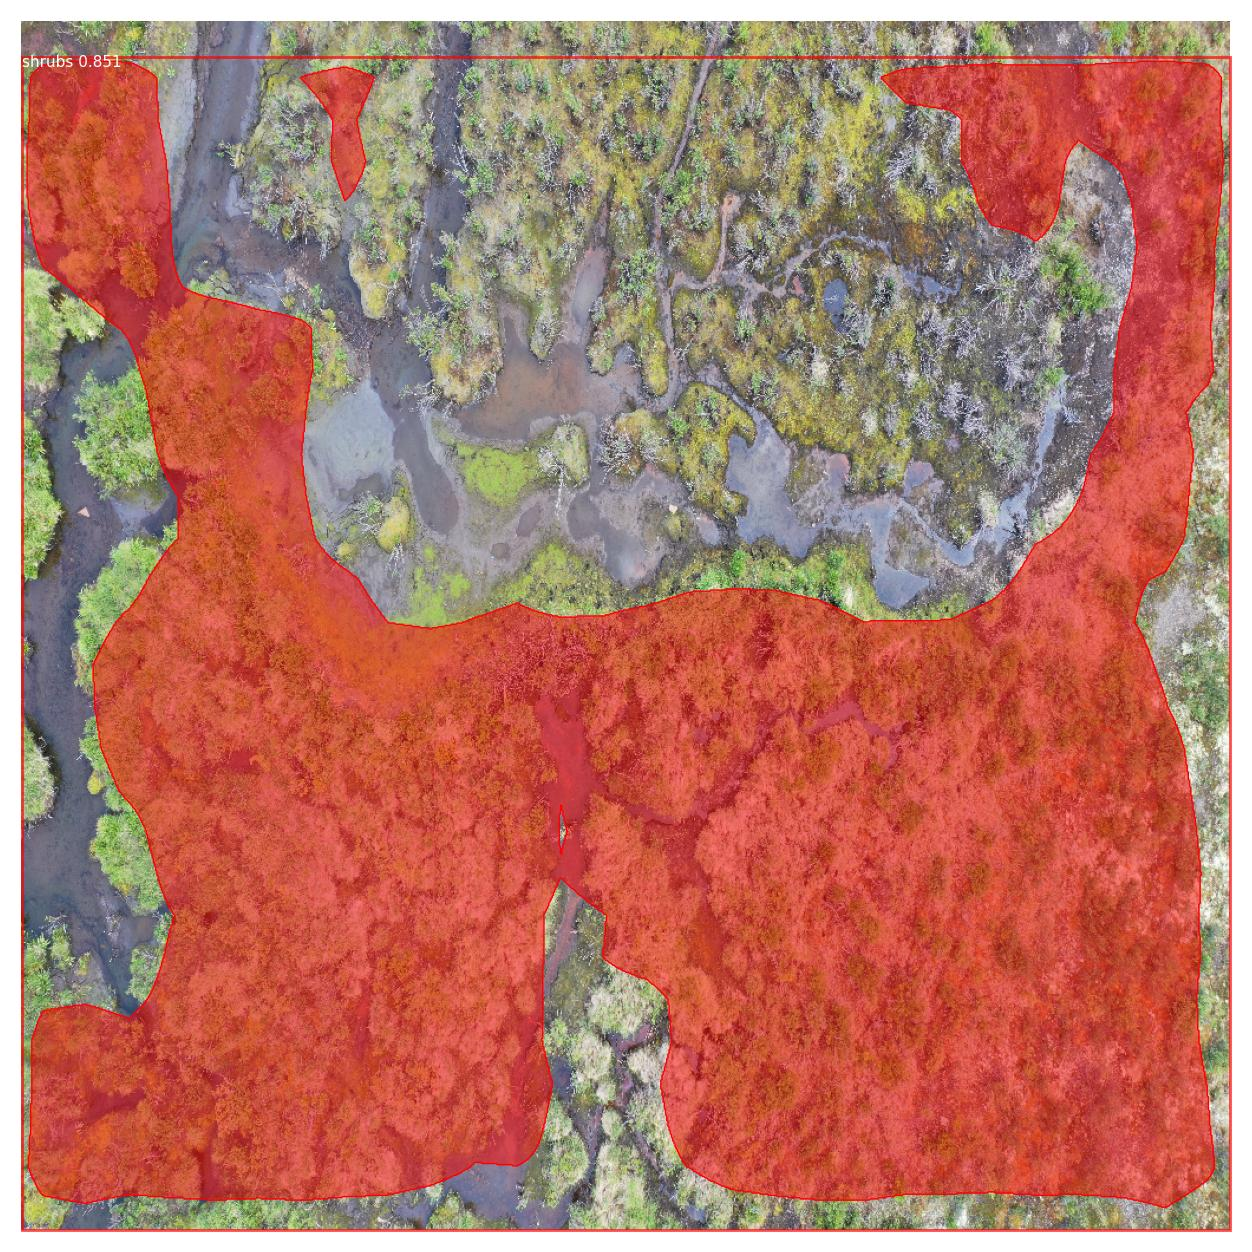

In [ ]:
#Checking model accuracy
image_ids = np.random.choice(dataset_val.image_ids, 9)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask = \
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps = \
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)

print("mAP: ", np.mean(APs))

**Results Analysis**

**Take Away**
* Starting with just a 103 images, using resizing, we managed to create a humongus data set with a count of around 412 which was further divided into test and train.

FROM
>* Training: 90
>* Validation: 13

TO
>* Training: 360
>* Validation: 52


**Observation**
* Considering the above, the model did perform ok with 360 epochs, taking around 4 to 5 hours.



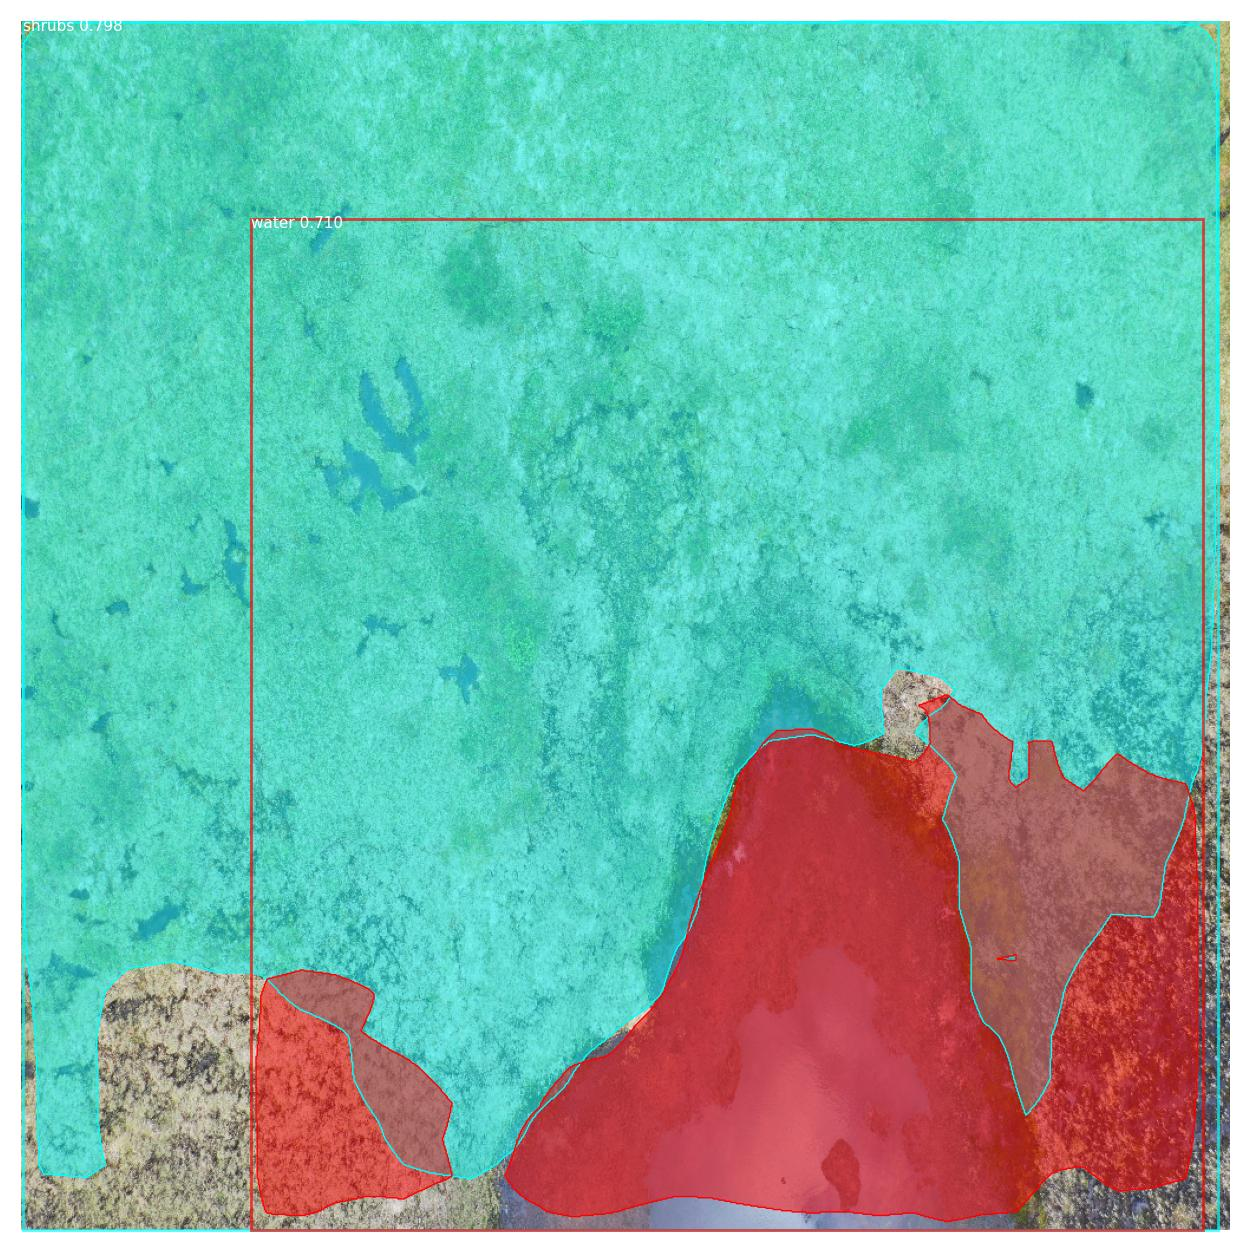

**Limitations**
* The model performs reasonably on the images but with more GPU power and increased image count it will give better results.
* We tried increasing the image count by resizing image to 24 times, however the model was too heavy for the GPU to handle.
* Referring to the below image, despite having 8 labels the model seem to struggle identifying 2 labels.
* TensorFlow 2.0.0 and Cuda 10.2 are incompatible with certian GPUs like RTX 3080, thus returning nan loss results when training.
* Google Colab also struggles when downsizing to TensorFlow 2.0.0.


**Way Ahead**
* The model successfully identifies semantic segmented terrain like vegetation and water however, as it masks all the similar terrains under one single colour it motivates us to think of another approach which utilizes Mask RCNN instance segmentationas we move to experiment III.


